# Project - EDA with Pandas Using the Ames Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains housing values in the suburbs of Ames.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file ``ames_train.csv``) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

In [2]:
# Let's get started importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('ggplot')

In [3]:
# Loading the data
df = pd.read_csv('ames_train.csv')

## General Investigation of the Overall Data

In [4]:
# Investigate the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

<div style="Text Align:Justify"> This test data set has 1460 entries in total, with 81 columns. It is worth noting that there are 43 out of 81 columns are objects, which leave 38 columns that contain integer or float values.</div>

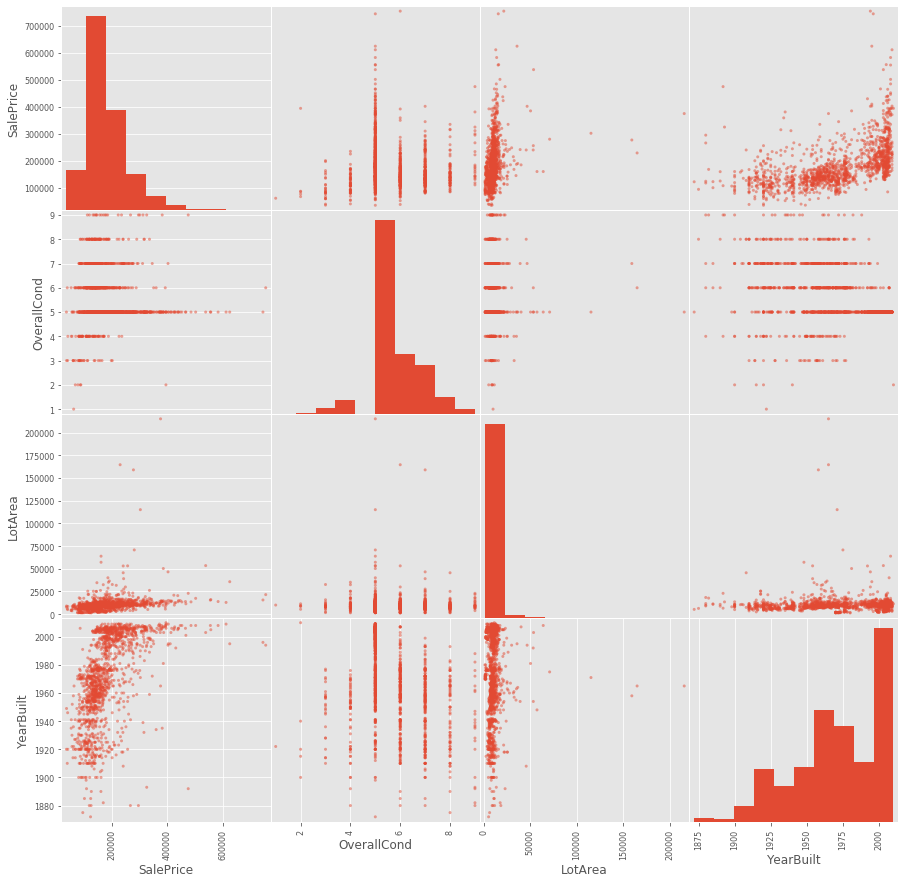

In [5]:
# Investigating Distributions using scatter_matrix
# Create smaller dataframe of SalePrice,OverallQual,OverallCond and LotArea from the WHOLE dataset
df1 = df[['SalePrice','OverallCond','LotArea','YearBuilt']]
pd.plotting.scatter_matrix(df1, figsize =(15,15))
plt.show()

In [6]:
# define 90th percentile
def percentile90(x):
    return x.quantile(0.9)
# define 10th percentile
def percentile10(x):
    return x.quantile(0.1)
# From the smaller dataframe focusing only on SalePrice, OverallCond, LotArea and YearBuilt
# work out the dispersions,the 10th and 90th percentile

df1.agg(['mean','median','min', 'max',percentile90, percentile10])

,SalePrice,OverallCond,LotArea,YearBuilt
mean,180921.19589,5.575342,10516.828082,1971.267808
median,163000.00000,5.000000,9478.500000,1973.000000
min,34900.00000,1.000000,1300.000000,1872.000000
max,755000.00000,9.000000,215245.000000,2010.000000
percentile90,278000.00000,7.000000,14381.700000,2006.000000
percentile10,106475.00000,5.000000,5000.000000,1924.900000


## What is the distribution of various zoning types in Ames?

<div style="text-align: justify"> I have never been to Ames and would like to learn more about its character through an analysis of the prevalence of various zoning types in the data. Is Ames a residential area? Are there any properties in land zoned as Agricultural, Commercial or Industrial? It would appear not as a subset of the WHOLE dataframe consisting of such properties is a null set with no entries.</div>

In [7]:
df_non_resi = df.loc[(df['MSZoning'] == 'A') | (df['MSZoning'] == 'C') | (df['MSZoning'] == 'I')]
df_non_resi

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


<div style="text-align: justify"> This is a strange conclusion since one would expect at least some commercial zoning to accompany a residential area.</div>

In [8]:
# If there are no non-residential zoned properties in the dataset,
# what then are the zone classifications for properties in Ames?
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

<div style="text-align: justify"><p> The output above clarifies the strange conclusion set out above; there ARE commerical zoned properties but they aren't marked down as 'C' rather, they are named 'C (all)'. The relevant residential zoning types are 'RL' (Residential low density),'RM'(Residential Medium Density) FV' (Floating Village Residential) and 'RH' (Residential High Density).<p>

<p> No properties zoned as agricultural or industrial appear in the data set. Bearing in mind that the data reflects <strong>SALES</strong> of properties, it may indicate that whilst there have been no <strong>SALES</strong> of agricultural or industrial property captured by the data. That is not the same as saying there is no industrial or agricultural property in Ames.<p> </div>

<div style="text-align: justify"> Now that we know what the principal zoning types are in Ames, we can proceed to analyse their breakdown.  We can also take a look at each type of housing density, the neighbourhoods in which such housing density can be found and the relative proportion of neighbourhoods for each type of housing density.</div>

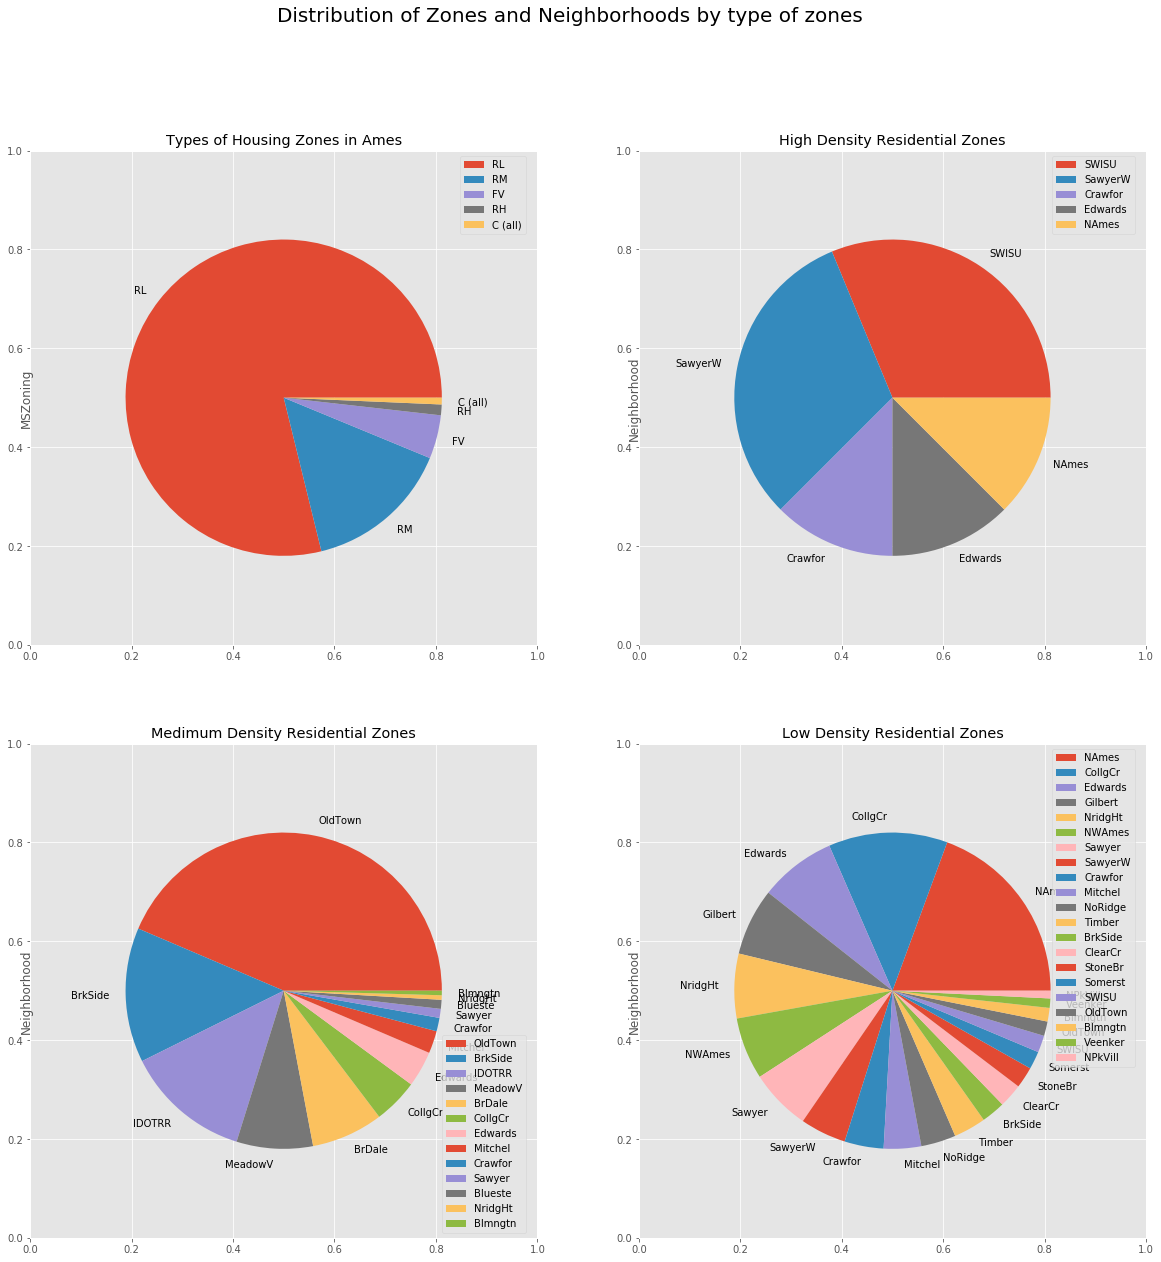

In [9]:
# what is the breakdown of each type of zone captured in the dataset?
zone_types = df['MSZoning'].value_counts()
zone_legend=list(df['MSZoning'])

# where are the High Density Residential areas in Ames?
df_high = df.loc[(df['MSZoning'] == 'RH')]
high_dense_areas = df_high['Neighborhood'].value_counts()
high_dense_legend = list(high_dense_areas)

# where are the Commercial areas in Ames?
df_comm = df.loc[(df['MSZoning'] == 'C (all)')]
comm_areas = df_comm['Neighborhood'].value_counts()
comm_areas_legend = list(comm_areas)

#where are the Medium Density Residential areas in Ames?
df_med = df.loc[(df['MSZoning'] == 'RM')]
med_dense_areas = df_med['Neighborhood'].value_counts()
med_dense_legend = list(med_dense_areas)

#where are the Low Density Residential areas in Ames?
df_low = df.loc[(df['MSZoning'] == 'RL')]
low_dense_areas = df_low['Neighborhood'].value_counts()
low_dense_legend = list(low_dense_areas)

# creating subplots from the various dataframes above breaking down the type of zone, location of high density housing

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.title.set_text('Types of Housing Zones in Ames')
ax2.title.set_text('High Density Residential Zones')
ax3.title.set_text('Medimum Density Residential Zones')
ax4.title.set_text('Low Density Residential Zones')
fig.suptitle('Distribution of Zones and Neighborhoods by type of zones', fontsize=20)
zone_types.plot(kind='pie', subplots=True, ax = ax1, radius = 0.8, legend = zone_legend)
high_dense_areas.plot(kind='pie', subplots=True, ax = ax2, radius = 0.8, legend = high_dense_legend)
med_dense_areas.plot(kind='pie', subplots=True, ax = ax3, radius = 0.8, legend = med_dense_legend)
low_dense_areas.plot(kind='pie', subplots=True, ax = ax4, radius = 0.8, legend = low_dense_legend)
plt.show()

## What is the distribution of prices of residential housing by density?

In [10]:
# Investigate the distribution of prices across different housing densities
high_dense_prices = df_high['SalePrice'] 
low_dense_prices = df_low['SalePrice']
med_dense_prices = df_med['SalePrice']
density_types = ['High Density Prices','Medium Density Prices','Low Density Prices']
density_prices = pd.concat([high_dense_prices,med_dense_prices,low_dense_prices], axis=1, keys=density_types)

price_distribution_density = density_prices.agg(['mean','median','min', 'max',percentile90, percentile10])
price_distribution_density

,High Density Prices,Medium Density Prices,Low Density Prices
mean,131558.375,126316.830275,191004.994787
median,136500.000,120500.000000,174000.000000
min,76000.000,37900.000000,39300.000000
max,200000.000,475000.000000,755000.000000
percentile90,170500.000,161000.000000,290000.000000
percentile10,80500.000,84500.000000,116000.000000


<div style="text align:justify"> Judging by their respective medians and their 90th percentiles, low density housing is the most expensive in Ames.</div>

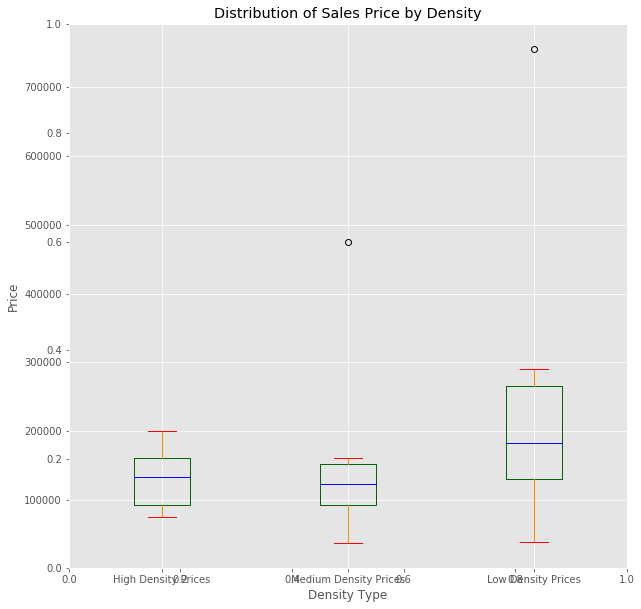

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
ax1 = fig.add_subplot(111)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='Blue', caps='Red')
price_distribution_density.plot(kind='box', figsize = (10,10), ax=ax1, fontsize = 10, color = color )
ax1.title.set_text('Distribution of Sales Price by Density')

plt.xlabel('Density Type')
plt.ylabel('Price')
plt.show()

<div style="text-align: justify"> The box plots above graphically demonstrates the distribution of prices by density of housing </div>

# Is property size a factor determining prices in Ames?

I expect to see a strong correlation between SalePrice and the various metrics used to measure the space of a particular property (ie LotArea, Basement Space, Floor Space etc, collectively, the "<strong>Space Metrics</strong>") . Is that borne out by the data?


In [14]:
# correlation between sale price of low density properties in Northridge Heights and space
NRHT_corr_map = df[['SalePrice', 'LotArea','LotFrontage','1stFlrSF','2ndFlrSF','TotalBsmtSF','BsmtUnfSF']].corr(method='pearson')
NRHT_corr_map.style.background_gradient(cmap='Reds')

,SalePrice,LotArea,LotFrontage,1stFlrSF,2ndFlrSF,TotalBsmtSF,BsmtUnfSF
SalePrice,1,0.263843,0.351799,0.605852,0.319334,0.613581,0.214479
LotArea,0.263843,1,0.426095,0.299475,0.0509859,0.260833,-0.00261836
LotFrontage,0.351799,0.426095,1,0.457181,0.0801773,0.392075,0.132644
1stFlrSF,0.605852,0.299475,0.457181,1,-0.202646,0.81953,0.317987
2ndFlrSF,0.319334,0.0509859,0.0801773,-0.202646,1,-0.174512,0.00446909
TotalBsmtSF,0.613581,0.260833,0.392075,0.81953,-0.174512,1,0.41536
BsmtUnfSF,0.214479,-0.00261836,0.132644,0.317987,0.00446909,0.41536,1


<div style = "Text Aligh: Justify"> That's interesting. The correlations are a lot weaker than I would expect it to be. I would have expected to pay more for more space. I wonder if the correlations between the Space Metrics and price are the same for the <strong>whole</strong> data set. </div>

In [15]:
# correlation between sale price of high density properties in Ames and space
overall_corr = df[['SalePrice', 'LotArea','LotFrontage','1stFlrSF','2ndFlrSF','TotalBsmtSF','BsmtUnfSF']].corr(method='pearson')
overall_corr.style.background_gradient(cmap='Greens')

,SalePrice,LotArea,LotFrontage,1stFlrSF,2ndFlrSF,TotalBsmtSF,BsmtUnfSF
SalePrice,1,0.263843,0.351799,0.605852,0.319334,0.613581,0.214479
LotArea,0.263843,1,0.426095,0.299475,0.0509859,0.260833,-0.00261836
LotFrontage,0.351799,0.426095,1,0.457181,0.0801773,0.392075,0.132644
1stFlrSF,0.605852,0.299475,0.457181,1,-0.202646,0.81953,0.317987
2ndFlrSF,0.319334,0.0509859,0.0801773,-0.202646,1,-0.174512,0.00446909
TotalBsmtSF,0.613581,0.260833,0.392075,0.81953,-0.174512,1,0.41536
BsmtUnfSF,0.214479,-0.00261836,0.132644,0.317987,0.00446909,0.41536,1


It does not look like one pays more for more space in Ames. In fact, it looks like the correlations between price and space are relatively stronger for low density properties than is the case overall. This makes sense given the price distribution of low density housing tends to cover a higher range of prices <strong>and</strong> it makes sense that low density housing tends to be larger in size anyway.

## Deciding where to live in Ames

<div style="Align-text: Justify"> Ames looks like it might be a nice place to live! I have decided to stay. Northridge Heights looks like a good spot.  I am looking for a property in good (or better) condition in Northridge Heights, where low density housing appears to be the predominant housing type by comparing the pie charts above. Housing in Northridge Heights make up a great proportion of the low density housing stock in Ames and a relatively much smaller proportion of medium density hosuing. There doesn't seem to be any high density housing in Ames. </div>

In [16]:
# Create subset of low density properties in Northridge Heights rated good or better
df_NridgHt = df.loc[(df['Neighborhood'] == 'NridgHt') & (df['OverallQual'] > 7) & (df['MSZoning'] == 'RL')]

<div style="Align-text: Justify"> It's a good idea to work out what the prices are like in this area and the size of property I could get for my money. </div>

In [17]:
# work out the dispersions in price and lot area for low density residential properties identified above
# as being located in Northridge Heights rated good
df_NridgHt_disp=df_NridgHt.agg(['mean','median','min', 'max',percentile90, percentile10])
df_NridgHt_disp[['SalePrice', 'LotArea']]

C:\Users\hsin\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,SalePrice,LotArea
mean,349105.135593,12081.847458
median,326000.000000,12220.000000
min,202500.000000,4590.000000
max,611657.000000,20431.000000
percentile90,447398.800000,14953.800000
percentile10,256140.000000,8579.200000


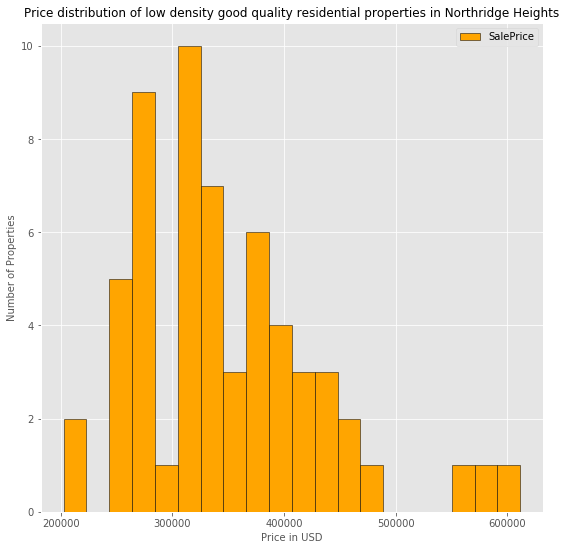

In [18]:
# Create a plot that shows the SalesPrice Distribution plotted against the LotArea for low density residential properties identified above. 
graph_title = 'Price distribution of low density good quality residential properties in Northridge Heights'
residential_plot = df_NridgHt.plot(y='SalePrice',kind='hist',bins =20, color='orange',edgecolor='black',figsize = (9,9))
plt.xlabel('Price in USD', fontsize = 10)
plt.ylabel('Number of Properties', fontsize = 10)
plt.title(graph_title, fontsize = 12)
plt.show()

<div style="text-align:Justify">Interpreting the graph above, if I want to live in a low density residential property located in Northridge Heights which is of at least a good quality, the range <strong>around</strong> the 300k price bracket provides the most choice. It is also worth noting that the 300k price is above the median sales price for the entire dataset, which is 163k it may therefore be worth concluding that Northridge Heights has expensive housing relative to the rest of Ames.</div>

In [19]:
# Create a list that consists of each neighbourhood in Ames
# there are 25 neighbourhoods in Ames
neighborhood_list = list(df['Neighborhood'].unique())
neighborhood_dict= dict(enumerate(df['Neighborhood'].unique()))
# The following line swaps keys and values around in the dictionary items of neighborhood_dict
neighborhood_dict = {value:key for key,value in neighborhood_dict.items()}
# The following line introduces a new column to the data set that gives a code number (which is an integer) to each neighbourhood
df['N_code'] = df['Neighborhood'].map(lambda x: neighborhood_dict[x])
# By having a column of integers which represent each neighborhood, the dataframe can parsed into a scatter plot.
df_Neighborhood = df[['LotArea', 'N_code']]


## Where are the big properties in Ames?

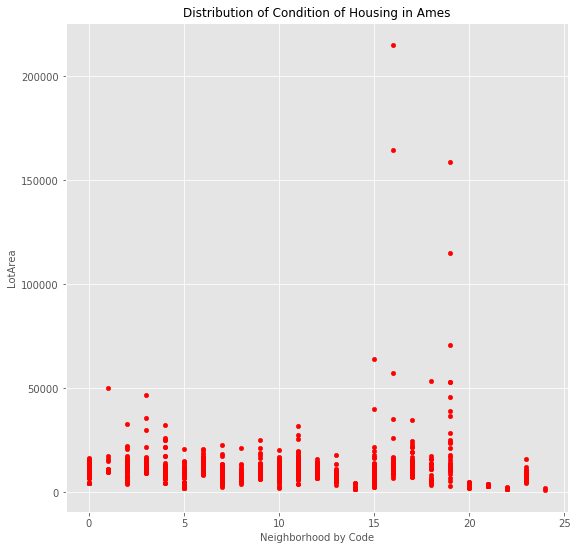

In [20]:
# Create a plot that shows the LotArea Distribution by neighbourhood
graph_title = 'Distribution of Condition of Housing in Ames'
LotArea_plot = df.plot(kind='scatter', x='N_code',y='LotArea',c='red', figsize = (9,9))
plt.xlabel('Neighborhood by Code', fontsize = 10)
plt.ylabel('LotArea', fontsize = 10)
plt.title(graph_title, fontsize = 12)
plt.show()

## Comparing the condition of housing vs size in Ames

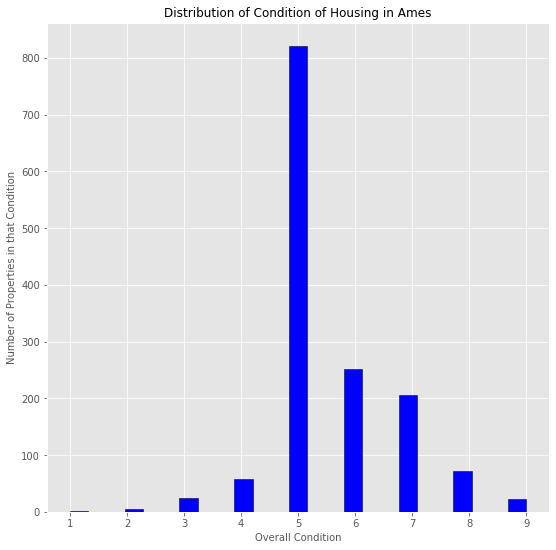

In [21]:
# Create a plot that shows the Distribution of the overall house condition
df_cond = df['OverallCond']
# Create a plot that shows the . 
graph_title = 'Distribution of Condition of Housing in Ames'
residential_plot = df_cond.plot(y='OverallCond',kind='hist',bins =25, color='blue',edgecolor='black',figsize = (9,9))
plt.xlabel('Overall Condition', fontsize = 10)
plt.ylabel('Number of Properties in that Condition', fontsize = 10)
plt.title(graph_title, fontsize = 12)
plt.show()

## The distribution of the age of homes and its sales price

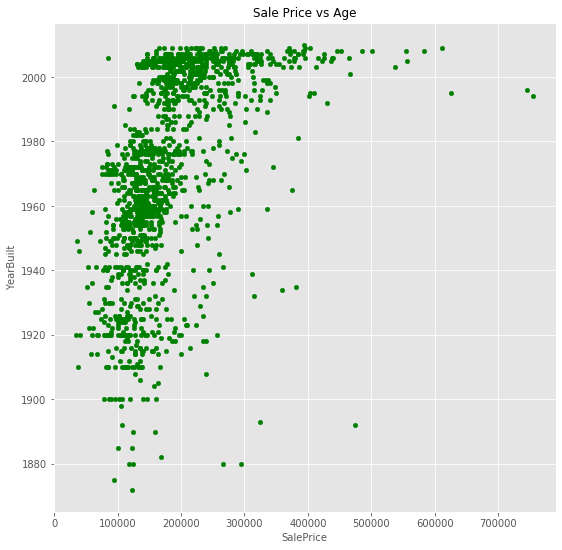

In [27]:
# Perform an Exploration of home values by age
SalePrice_vs_Age = df[['SalePrice','YearBuilt']]
graph_title = 'Sale Price vs Age'
SalePrice_vs_Age_plot = SalePrice_vs_Age.plot(kind='scatter', x='SalePrice',y='YearBuilt',c='green', figsize = (9,9))
plt.xlabel('SalePrice', fontsize = 10)
plt.ylabel('YearBuilt', fontsize = 10)
plt.title(graph_title, fontsize = 12)
plt.show()

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!